# Prosper Loan Data
## by Joseph Edet

## Investigation Overview

The goal of this project is to investigate variables in the loan dataset, the main variable of interest being the Annual Percentage Rate of a borrower. My purpose is to use summary statistics and visualizations to find out what factors might influence the APR of the borrower. Univariate, bivariate and multivariate explorations were carried out to achieve my goal.


## Dataset Overview

This project is an exploration of a loan dataset from Prosper Fundings LLC - A peer-to-peer online marketplace. The dataset contains information about 113,937 loans and 81 variables which include loan term, original amount of the loan, date of loan listing, information about the borrower like his/her employment status, income range, monthly income, debt-to-income ratio and a host of others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
sub_cols = ['ListingKey','Term','BorrowerAPR','ProsperScore','Occupation',
           'DebtToIncomeRatio','IncomeRange','IsBorrowerHomeowner',
           'LoanOriginalAmount','EmploymentStatus']
df_sub = df[sub_cols]

In [4]:
df_sub.dropna(subset=['BorrowerAPR'], inplace=True)

## How is BorrowerAPR distributed

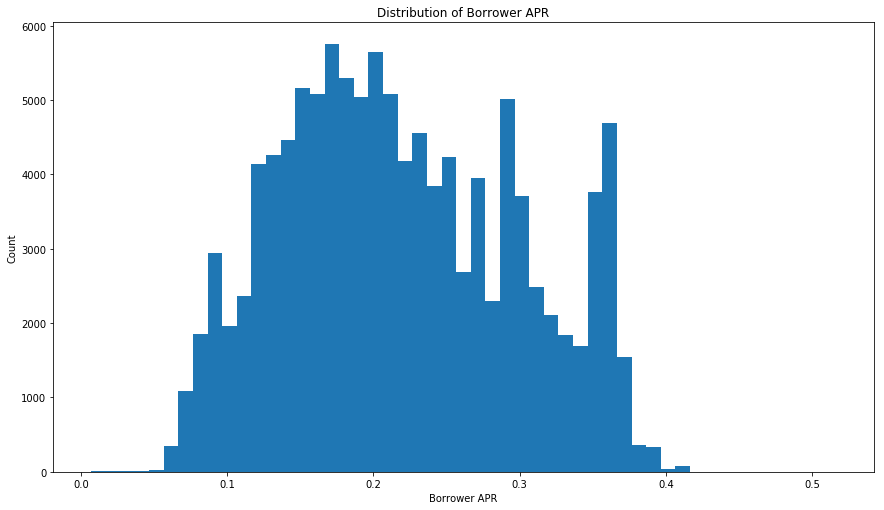

In [5]:
bins = np.arange(df_sub['BorrowerAPR'].min(), df_sub['BorrowerAPR'].max()+0.01, 0.01)
plt.figure(figsize=(14.70,8.27))
plt.hist(data=df_sub, x='BorrowerAPR', bins=bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR');

The distrubution of BorrowerAPR column is multimodal with the highest peaks between 0.1 and 0.2

## How Does Prosper Score Influence Borrower APR

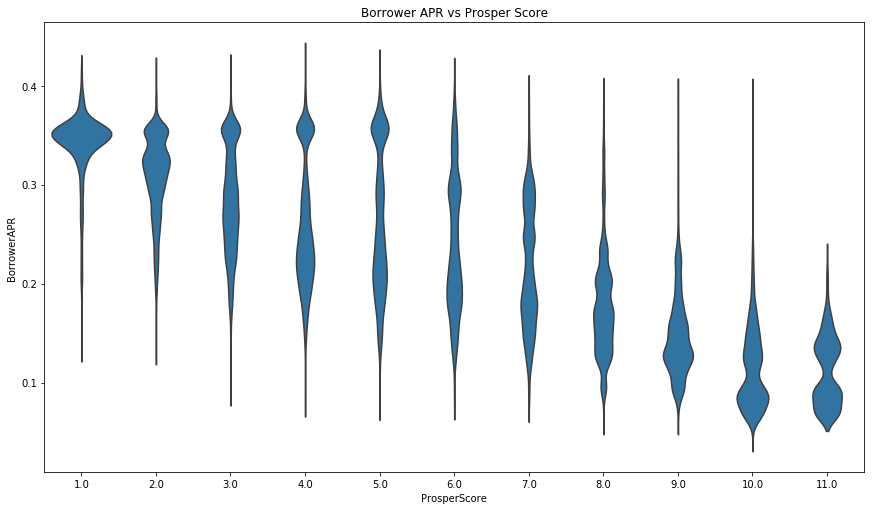

In [6]:
base_color = sns.color_palette()[0]
plt.figure(figsize=(14.70,8.27))
sns.violinplot(data=df_sub, x='ProsperScore', y='BorrowerAPR', inner=None, color=base_color)
plt.title('Borrower APR vs Prosper Score');

There is a strong negative correlation between ProsperScore and BorrowerAPR. Higher Prosper scores correlate with lower Annual Percentage Rates as seen by this violinplot. ProsperScore should be a measure of risk and trusthworthiness so this makes sense. The cost of taking a loan from Prosper would be cheaper if the company sees you as a trustworthy person and I assume this would be influenced by the the outcome of your loans in the past

## Does Having a High Income and a Home Influence APR



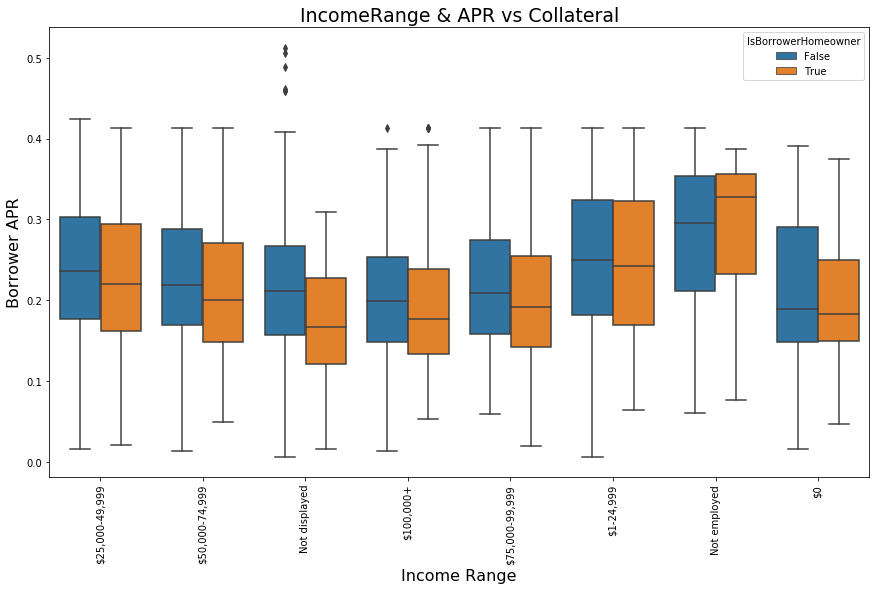

In [9]:
plt.figure(figsize=(14.70,8.27))
sns.boxplot(data=df_sub,x='IncomeRange', y='BorrowerAPR', hue='IsBorrowerHomeowner')
plt.xlabel('Income Range', size=16)
plt.ylabel('Borrower APR', size=16)
plt.title('IncomeRange & APR vs Collateral', size=19)
plt.xticks(rotation=90);

The boxplot suggests that borrowers who don't have collateral are likely to get higher rates. But quite interesting, having a home doesn't really influence low-income owners' APR. Looking at the $1-24,999 range of income, even though the group have the highest rates, the differences between home owners and non-home owners in terms of APR distribution isn't much. 

## Conclusion

I found ProsperScore to be the variable that is most strongly correlated with Borrower APR and thus has the largest influence.